In [ ]:
import numpy as np
X_train, X_test, y_train, y_test = np.load('X_train.npy'), np.load('X_test.npy'), np.load('y_train.npy'), np.load('y_test.npy')

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
def create_model(num_neurons=5, num_layers=1, activation= 'relu', drop_ratio=0.2):
    model = Sequential()
    model.add(Dense(num_neurons, activation = 'relu', input_shape = (X_train.shape[1],)))
    model.add(Dropout(drop_ratio))
    for i in range(num_layers-1):
        model.add(BatchNormalization())
        model.add(Dense(num_neurons, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    return model

In [ ]:
for i in range(1,10):
    for j in range(5,31,5):
        model= create_model(num_neurons=j, num_layers=i)
        model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)
        loss, acc = model.evaluate(X_test, y_test)
        print('Test accuracy:', acc)
        print('Test loss', loss)
        plt.plot(history.history['loss'], label= 'training')
        plt.plot(history.history['val_loss'], label= 'validation')
        plt.legend()
        plt.show()

In [ ]:
for k in range(5):
    drop_ratio = k*0.1
    print('Dropout: ',drop_ratio)
    model= create_model(num_neurons=20, num_layers=8, drop_ratio = drop_ratio)
    model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)
    plt.plot(history.history['loss'], label= 'training')
    plt.plot(history.history['val_loss'], label= 'validation')
    plt.legend()
    plt.show()

In [ ]:
model= create_model(num_neurons=20, num_layers=8)
model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)
print('Test loss', loss)
plt.plot(history.history['loss'], label= 'training')
plt.plot(history.history['val_loss'], label= 'validation')
plt.legend()
plt.show()

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 100)
model= create_model(num_neurons=20, num_layers=8)
model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=500, verbose = 2, validation_split = 0.1, callbacks=[es])
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)
print('Test loss', loss)
plt.plot(history.history['loss'], label= 'training')
plt.plot(history.history['val_loss'], label= 'validation')
plt.legend()
plt.show()

In [10]:
history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)

In [11]:
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)
print('Test loss', loss)

5/5 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9643
Test accuracy: 0.9642857313156128
Test loss 0.10705696046352386


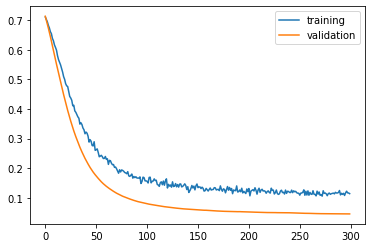

In [9]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label= 'training')
plt.plot(history.history['val_loss'], label= 'validation')
plt.legend()
plt.show()

In [12]:
row = X_test[5:100,:]
labels = y_test[5:100]
predictions = model.predict(row).round().reshape(labels.shape)
# print('Predicted: ', predictions)
# print('Labels: ', labels)

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels, predictions))

[[60  3]
 [ 2 30]]
